In [1]:
%load_ext autoreload
%autoreload 2

from perturbations import *
from representation import *
from ls import *
import jupyter_utils as utils
from ea import *
from cross import *

import numpy as np
import matplotlib.pyplot as plt
import tsplib95

In [98]:
stoping_criterion = 5_000

In [2]:
# load problem from the library
problem = tsplib95.load("./archives/bayg29.tsp/bayg29.tsp")
#  ./archives/bayg29.tsp/bayg29.tsp
n = problem.dimension
distance_matrix = utils.weights_to_matrix(problem.edge_weights)
print("size of matrix: ", n)
# best = 1610
fitness_fn = fitness_wrapper(distance_matrix)

size of matrix:  29


In [97]:
# generate the problem instance
n = 200  # number of cities
distance_matrix = random_distances(n)

print("Generated distances between cities:")
print(distance_matrix)
fitness_fn = fitness_wrapper(distance_matrix)

Generated distances between cities:
[[ 0 19 41 ... 81 38 19]
 [19  0 61 ... 63 52 68]
 [41 61  0 ... 73 46 30]
 ...
 [81 63 73 ...  0 75 16]
 [38 52 46 ... 75  0 53]
 [19 68 30 ... 16 53  0]]


In [99]:
init = better_init_wrapper(size=n, dist_matrix=distance_matrix)
# will be reused inside the function to init the population

# instance changes
crossover = crossover_scx
perturb = perturb_move

# population management
replacement = combined_replacement
selection = tournament_selection

# generations consts
prob_cross = 0.5
prob_mut = 0.05
gen_size = 1000
num_offsprings = 1000
tourn_size = 50
print(
    "approx number of offsprings created from each generation: ",
    num_offsprings * prob_cross,
)

results = ea_alg(
    fitness_fn=fitness_fn,
    init_fn=init,
    selection_fn=selection,
    crossover_fn=crossover,
    mutation_fn=perturb,
    replacement_fn=replacement,
    generation_size=gen_size,
    distance_matrix=distance_matrix,
    p_cross=prob_cross,
    offspring_num=num_offsprings,
    p_mut=prob_mut,
    tournament_size=tourn_size,
    max_evaluations=stoping_criterion,
)
utils.print_results(results)
history = results["history"]
evals_taken = history[-1]["evals"]

starting evolution:  best fitness of init 9593
Generation 0: 5775, 7845.137
Generation 1: 4546, 5979.964
Generation 2: 3969, 4970.834
Generation 3: 3570, 4271.93
Generation 4: 3168, 3805.954
Generation 5: 3024, 3526.124
Generation 6: 2770, 3294.423
Generation 7: 2618, 3075.312
Generation 8: 2577, 2906.196
Best solution found:
[ 34 146 131 164  95  68   7 199  73 111 170 116  74 184 103 122  93  49
  38 162 160  31 143 126 156  67 195  60 157 155 151 165  53   4  28   9
 136 141 186 168  14  21 183  77   3  10 196  12 142 153  56  47 154  16
  90  98  70  91  55   0  94 127 175 115 118 191  50  35 133  32 105 193
  87  88  43 120 138  64 117 109 167 101 189  99   2 114  62   8  84 159
  18 166 161 172 104   1  66  40 180 112 121 135  48 173 113  57 106 124
  26 185  20  72  44  45  24 128  83 107  71 110 108  11  29  42 182 119
  27 149  39  17  51 192  65 198  75 178 144  23 148 130 152   5  52 187
   6 125 197 194 158  81 174  85  19 163 123 171 169  15  61 177  33  37
  76  63 102  5

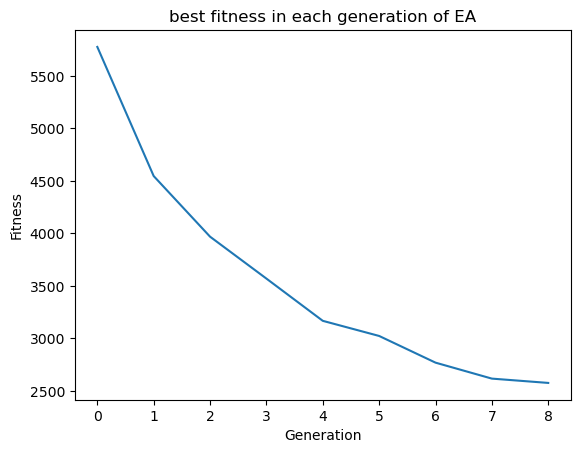

In [100]:
fitness = [iteration["best_fitness"] for iteration in history]
utils.simple_graph(
    fitness,
    "Generation",
    "Fitness",
    f"best fitness in each generation of EA",
)

In [105]:
perturbation = perturb_switch
#           perturb_move
#           perturb_invert
#           perturb_switch

ls = ls_first_improvement

init_fn = better_init_wrapper(size=n, dist_matrix=distance_matrix)


# inits
fitness = fitness_wrapper(distance_matrix)

# do the search here!
results_ls = ls(
    fitness_fn=fitness,
    initialisation_fn=init_fn,
    perturbation_fn=perturbation,
    stop_cond=evals_taken,
)

# separate and print results!
best_fitness_ls = results_ls["best_fitness"]
best_order_ls = results_ls["best_order"]
history_ls = results_ls["history"]
utils.print_results(results_ls)

Best solution found:
[132  82 105 197 103  74 122  76 190  42  67 167 111 109   6 179 120  97
 149   3  73  64 148 142  31  35 133 191 199  80  38  58  17  47 156 152
  90 110 131 185  87 112  93  33 166 143 108  29  40 184  81  43  37  39
  85 137  51 118 115 175  60 130 181  10 100 119 161 164 101   7  57 193
 180 188  22  98 125 146  13  45  72 102  59  16 177 183  91 157  49 141
 129  54  66 134  88 136 123 178 113  69 170   2 135  63 145  18  70  95
 158  14 171 169 124 176  27 162  55 127 160  71  28 159  12  77  21  26
   4 196  48 107 189  25 198  30  56  68 154  62 195  41  86  20 172   0
  78  84 147  23 144 163 187  52 121 155 153  50 192 182 117  94 128 165
  83  44 186 168  99  46 138  61  75   5 106 116  11  79  34  65  15 150
   1 174  89 140   9  32   8 194  36  92  96  19 151 104 139  53  24 126
 173 114]
With fitness:  2870
Total steps taken:  184
